In [2]:
import pandas as pd

df1 = pd.read_csv('~/Desktop/fct_invoice.csv')

df2 = pd.read_json('~/Desktop/dim_customer.json')

In [3]:
df1

,invoice_no,customer_id,category,quantity,price,payment_method,invoice_date,shopping_mall
0,I138884,229,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon
1,I317333,3433,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul
2,I127801,644,Clothing,1,300.08,Cash,9/11/2021,Metrocity
3,I173702,4900,Shoes,5,3000.85,Credit Card,16/05/2021,Metropol AVM
4,I337046,1089,Books,4,60.60,Cash,24/10/2021,Kanyon
...,...,...,...,...,...,...,...,...
99452,I219422,2344,Souvenir,5,58.65,Credit Card,21/09/2022,Kanyon
99453,I325143,172,Food & Beverage,2,10.46,Cash,22/09/2021,Forum Istanbul
99454,I824010,425,Food & Beverage,2,10.46,Debit Card,28/03/2021,Metrocity
99455,I702964,577,Technology,4,4200.00,Cash,16/03/2021,Istinye Park


In [4]:
df2

,age,first_name,gender,id,last_name
0,48.0,Nicholas,M,0,Flores
1,NaN,Jeffery,M,1,Rowe
2,57.0,Alexis,F,2,Benton
3,73.0,Amy,F,3,Johnson
4,20.0,David,M,4,Moore
...,...,...,...,...,...
5186,NaN,Arthur,M,9428,Harris
5187,NaN,David,M,9494,Roy
5188,85.0,Thomas,M,10350,Turner
5189,NaN,April,F,10587,Sanchez


In [5]:
#1-Easy: How many unique customers are in the dataset?
df1["customer_id"].nunique()

5191

In [6]:
#2-Easy: What are the different categories of products available? How many unique categories are there?
#2a-Easy Different categories of products available
df1['category'].unique().tolist()

['Clothing',
 'Shoes',
 'Books',
 'Cosmetics',
 'Food & Beverage',
 'Toys',
 'Technology',
 'Souvenir']

In [7]:
#2b Number of unique categories
len(df1['category'].unique())

8

In [8]:
#3-Easy Which payment method is the most popular? How many times was it used?
#3a-Easy: Which payment method is the most popular?
df1['payment_method'].mode()[0]

'Cash'

In [9]:
#3b-Easy: How many times was it used?
df1[df1['payment_method'] == 'Cash'].shape[0]

44447

In [10]:
#1-Medium: What are the three most popular categories, by total sales?
df1['Total_sales'] = df1['quantity'] * df1['price']

top_categories = df1.groupby('category')['Total_sales'].sum().nlargest(3)
top_categories.index.tolist()

['Clothing', 'Shoes', 'Technology']

In [11]:
#2-Medium: What are the total sales attributed to customers over the age of 45?
merged_table = pd.merge(df1, df2, left_on = 'customer_id', right_on = 'id', how = 'outer')
merged_table['total_sales'] = merged_table['quantity']*merged_table['price']
table_for_over_45 = merged_table[merged_table['age']>45]
total_sales = table_for_over_45['total_sales'].sum()
total_sales

82039768.14999999

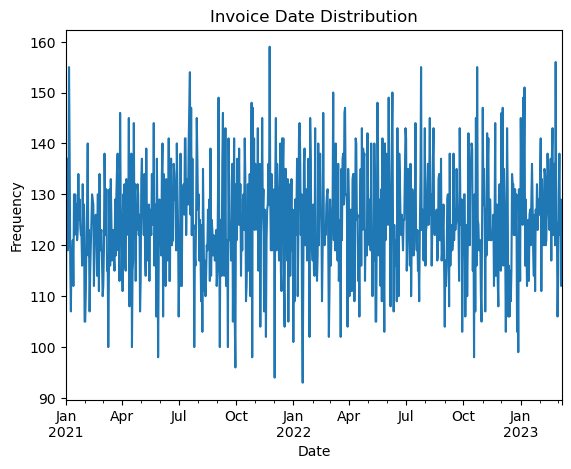

In [12]:
#3-Medium: How is the data distributed across different invoice dates? Are there any seasonal trends or patterns? (Use a graph for this.)
import matplotlib.pyplot as plt
from datetime import datetime

df1['invoice_date'] = pd.to_datetime(df1['invoice_date'], errors = 'coerce', dayfirst = True)

sorted_dates = df1['invoice_date'].value_counts().sort_index()
sorted_dates.plot()
plt.title("Invoice Date Distribution")
plt.xlabel("Date")
plt.ylabel("Frequency")
plt.show()

#Essay answer: There are no seasonal trends in the dataset.

In [18]:
#1-Hard: Create a pivot table showing the breakdown of sales across these dimensions, in this order: category, decade age range (e.g., 10-19, 20-29, and so forth).
merged_df = df1.merge(df2[['id', 'age']], how='left', left_on='customer_id', right_on='id')
merged_df = merged_df.dropna(subset=['age'])
merged_df['Total_sales'] = merged_df['quantity'] * merged_df['price']
bins = list(range(10, 100, 10)) 
labels = [f"{i}-{i+9}" for i in bins[0:-1]]

merged_df['age_group'] = pd.cut(merged_df['age'], bins=bins, labels=labels, right=False)
merged_df = merged_df.dropna(subset=['age_group'])
pd.pivot_table(
    merged_df,
    values='Total_sales',
    index='category',
    columns='age_group',
    aggfunc='sum',
    fill_value=0 
)

/var/folders/dk/dwlf3s3n1yj6wmvs7x1v56bc0000gn/T/ipykernel_26308/2602713935.py:10: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pd.pivot_table(


age_group,10-19,20-29,30-39,40-49,50-59,60-69,70-79,80-89
category,,,,,,,,
Books,12801.75,79461.75,84143.10,87203.40,74962.20,80476.80,54827.85,26664.00
Clothing,1927413.84,10250732.80,11354126.96,11215189.92,10321851.76,10660642.08,7769371.28,4493698.00
Cosmetics,109619.36,605915.32,723544.70,665034.96,587780.96,649990.76,419082.62,254531.60
Food & Beverage,13582.31,73491.96,87246.86,89553.29,72425.04,80976.09,55050.98,31332.93
Shoes,993281.35,5924878.24,7200839.66,7025590.02,5852857.84,5978893.54,4480269.05,2628744.60
Souvenir,12375.15,54943.32,64092.72,66391.80,54943.32,55025.43,38673.81,23718.06
Technology,1129800.00,5261550.00,6159300.00,5954550.00,4435200.00,5471550.00,3638250.00,1946700.00
Toys,60426.24,385100.80,420582.40,390906.88,345067.52,363955.20,273244.16,153932.80
